In [1]:
#Ensemble des import utiles pour l'execution du notebook
import statsTuxML
import csv
from sklearn.neighbors import NearestNeighbors
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


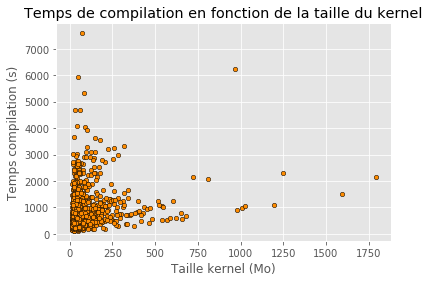

Coefficient de correlation : 0.1965012283328304


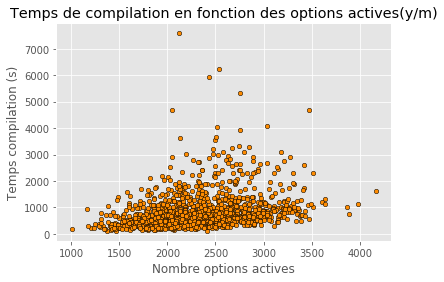

Coefficient de correlation : 0.30553652200729986


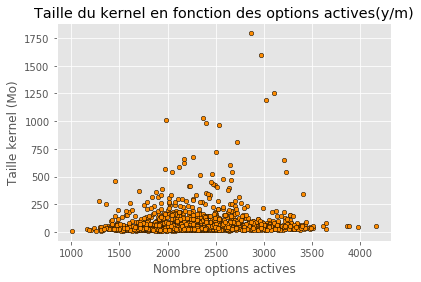

Coefficient de correlation : 0.07047131774623469


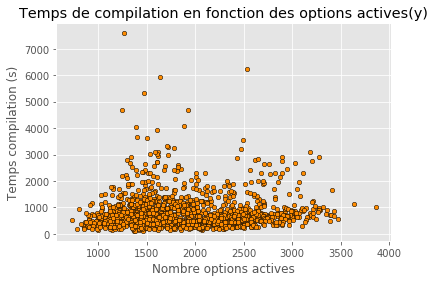

Coefficient de correlation : 0.053762795057960035


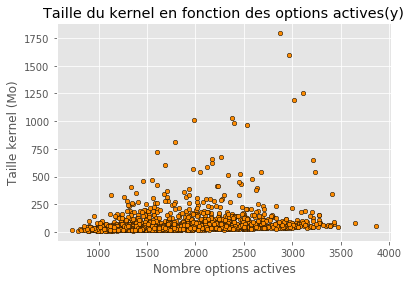

Coefficient de correlation : 0.20321368571247317


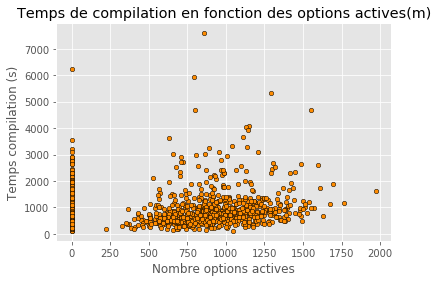

Coefficient de correlation : 0.21769427530934474


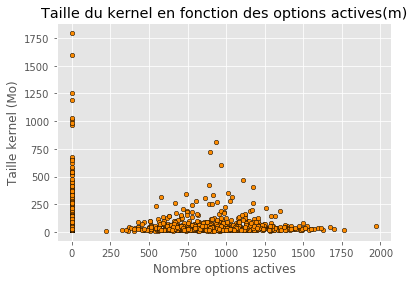

Coefficient de correlation : -0.17365226576090256

Nombre de compilation 1646
Informations sur les options activées en module {'Total': 740991, 'Max': 1972, 'Min': 0, 'Mean': 450.1767922235723}
Informations sur les options activées en dur {'Total': 3067998, 'Max': 3864, 'Min': 724, 'Mean': 1863.9113001215067}
Informations sur les options activées en tout {'Total': 3808989, 'Max': 4167, 'Min': 1005, 'Mean': 2314.088092345079}
Informations sur la taille du kernel {'Total': 121893.61404418945, 'Max': 1792.972885131836, 'Min': 10.527030944824219, 'Mean': 74.05444352623904}
Informations sur le temps de compilation {'Total': 1304351.442, 'Max': 7588.32, 'Min': 108.521, 'Mean': 792.437085054678}


In [2]:
statistiques = statsTuxML.stats("set4.csv")
nbComp, stats_module, stats_yes, stats_combine, stats_size, stats_time  = statistiques

print("")
print("Nombre de compilation", nbComp)
print("Informations sur les options activées en module", stats_module)
print("Informations sur les options activées en dur", stats_yes)
print("Informations sur les options activées en tout", stats_combine)
print("Informations sur la taille du kernel", stats_size)
print("Informations sur le temps de compilation", stats_time)



In [3]:
#Extraction des données du CSV

dataBrut = [] #Toutes les infos sans temps de compilation et taille du kernel
info = [] #Temps de compilation et taille du kernel

infoTime = []
infoSize =[]

with open("set4.csv") as csvFile :
    reader = csv.DictReader(csvFile)
    for ligne in reader :
        size = int(ligne["KERNEL_SIZE"]) / (2**20)
        comp = float(ligne["COMPILE_TIME"])
        infoTime.append(comp)
        infoSize.append(size)
        info.append([size,comp])
        tmp = {}
        for i in ligne :
            if i !="KERNEL_SIZE" and i !="COMPILE_TIME" and i != "":
                tmp[i] = ligne[i]
        dataBrut.append(tmp)


In [4]:
#Preprocessing des data
v = DictVectorizer(sparse=False)
dataPreProcess = v.fit_transform(dataBrut)
#v.get_feature_names()


['104_QUAD_8=m',
 '104_QUAD_8=n',
 '104_QUAD_8=y',
 '21285_WATCHDOG=n',
 '3C515=n',
 '53C700_BE_BUS=n',
 '53C700_LE_ON_BE=n',
 '60XX_WDT=m',
 '60XX_WDT=n',
 '60XX_WDT=y',
 '64BIT=y',
 '6LOWPAN=m',
 '6LOWPAN=n',
 '6LOWPAN=y',
 '6LOWPAN_DEBUGFS=n',
 '6LOWPAN_DEBUGFS=y',
 '6LOWPAN_GHC_EXT_HDR_DEST=m',
 '6LOWPAN_GHC_EXT_HDR_DEST=n',
 '6LOWPAN_GHC_EXT_HDR_DEST=y',
 '6LOWPAN_GHC_EXT_HDR_FRAG=m',
 '6LOWPAN_GHC_EXT_HDR_FRAG=n',
 '6LOWPAN_GHC_EXT_HDR_FRAG=y',
 '6LOWPAN_GHC_EXT_HDR_HOP=m',
 '6LOWPAN_GHC_EXT_HDR_HOP=n',
 '6LOWPAN_GHC_EXT_HDR_HOP=y',
 '6LOWPAN_GHC_EXT_HDR_ROUTE=m',
 '6LOWPAN_GHC_EXT_HDR_ROUTE=n',
 '6LOWPAN_GHC_EXT_HDR_ROUTE=y',
 '6LOWPAN_GHC_ICMPV6=m',
 '6LOWPAN_GHC_ICMPV6=n',
 '6LOWPAN_GHC_ICMPV6=y',
 '6LOWPAN_GHC_UDP=m',
 '6LOWPAN_GHC_UDP=n',
 '6LOWPAN_GHC_UDP=y',
 '6LOWPAN_NHC=m',
 '6LOWPAN_NHC=n',
 '6LOWPAN_NHC=y',
 '6LOWPAN_NHC_DEST=m',
 '6LOWPAN_NHC_DEST=n',
 '6LOWPAN_NHC_DEST=y',
 '6LOWPAN_NHC_FRAGMENT=m',
 '6LOWPAN_NHC_FRAGMENT=n',
 '6LOWPAN_NHC_FRAGMENT=y',
 '6LOWPAN_NHC_

In [5]:
#Separation du training set et du testing set
#data_train, data_test, info_train, info_test = train_test_split(dataPreProcess, info, test_size=0.2, random_state=0)

data_train, data_test, infoSize_train, infoSize_test = train_test_split(dataPreProcess, infoSize, test_size=0.2, random_state=0)



In [6]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor() #Pas de profondeur max
regr_1.fit(data_train, infoSize_train)
regr_2.fit(data_train, infoSize_train)

# Predict
info_predict_1 = regr_1.predict(data_test)
info_predict_2 = regr_2.predict(data_test)

absErr_1 = mean_absolute_error(infoSize_test, info_predict_1)
absErr_2 = mean_absolute_error(infoSize_test, info_predict_2)

sqrtErr_1 = mean_squared_error(infoSize_test, info_predict_1)
sqrtErr_2 = mean_squared_error(infoSize_test, info_predict_2)

r2Score_1 = r2_score(infoSize_test, info_predict_1)
r2Score_2 = r2_score(infoSize_test, info_predict_2)

#Affichage des marges d'erreurs
print("Valeur faible = Meilleur prédiction")
print("Moyenne absolue des erreurs : arbre 1 :", absErr_1, "; arbre 2 :", absErr_2)
print("Moyenne au carré des erreurs : arbre 1 :", sqrtErr_1, "; arbre 2 :", sqrtErr_2)
print("")
print("Valeur proche de 1 = Meilleur prédiction")
print("Score r² : arbre 1 :", r2Score_1, "; arbre 2 :", r2Score_2)


Valeur faible = Meilleur prédiction
Moyenne absolue des erreurs : arbre 1 : 44.480724981322076 ; arbre 2 : 48.5298261237867
Moyenne au carré des erreurs : arbre 1 : 17469.766018495415 ; arbre 2 : 17626.552248764834

Valeur proche de 1 = Meilleur prédiction
Score r² : arbre 1 : -0.1472768382388452 ; arbre 2 : -0.15757332477177566
